# Volatility Forecasting: ARCH/GARCH

## Volatility: Definition and Measurement
https://en.wikipedia.org/wiki/Volatility_(finance)


Defined as the degree of variation of a trading price series over time, usually measured by the standard deviation of logarithmic returns or simple returns.

#### Historic volatility measures a time series of PAST market prices. 

#### Implied volatility looks forward in time, being derived from the market price of a market-traded derivative (in particular, an option). (See root finding algorithms)

### Terminology

#### Actual Current Volatility
Volatility of a financial instrument for a specified period, based on historical prices over the specified period with the last observation the most recent price.

#### Actual Historical Volatility
Refers to the volatility of a financial instrument over a specified period but with the last observation on a date in the past

near synonymous is realized volatility, the square root of the realized variance, in turn calculated using the sum of squared returns divided by the number of observations.

#### Actual Future Volatility
refers to the volatility of a financial instrument over a specified period starting at the current time and ending at a future date

#### Historical Implied Volatility
refers to the implied volatility observed from historical prices of the financial instrument 

#### Current Implied Volatility
refers to the implied volatility observed from current prices of the financial instrument

#### Future Implied Volatility
refers to the implied volatility observed from future prices of the financial instrument



### Mathematical Definitions
volatility is defined as the standard deviation of a sequence of random variables, each of which is the return of the fund over some corresponding sequence of (equally sized) times.


The generalized volatility $\sigma_T $ for a time horizon $T$ in years is,
$$\sigma_{T} = \sigma_{annually}\sqrt{T}$$
Thus, if the daily logarithmic returns of a stock have standard deviation of $\sigma_{daily}$ and the time period of returns is $P$ in trading days, the annaulized volatility is
$$\sigma_{annually} = \sigma_{daily}\sqrt{P}$$
Therefore,
$$\sigma_{T} = \sigma_{daily}\sqrt{PT}$$
It is common standard that $P$ = 252 Trading days in a year

However, formulas used above to convert returns or volatility measures from one time period to another assume a particular underlying model or process. 




In [48]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr

import yfinance as yfin
yfin.pdr_override()


import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats

[*********************100%%**********************]  1 of 1 completed


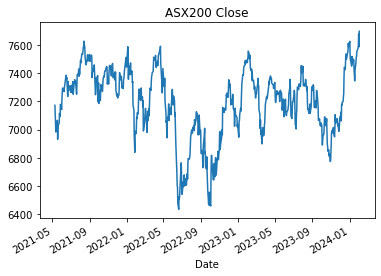

In [15]:
#Setting some arbitrary time period

end = dt.datetime.now()
start =end - dt.timedelta(days=1000)

# Importing some stock data
df = pdr.get_data_yahoo('^AXJO', start, end)

#print(df.head())


adjusted_close = df['Close']
adjusted_close.plot()
plt.title('ASX200 Close')
plt.show()


### Calculate Volatility

The calculations below are only statistics describing the data set with it's current entries. While in periods of relative calm for financial markets, one can 'generally' assume a predictable and constant volatility, atleast for smaller time periods etc.

However, in reality volatility is continually changing in real markets. It is commonly observed that in periods, prices go up and down quickly, while during other times they barely move at all.






In [39]:
### Calculating returns
df['return'] = 100*(df['Close'].pct_change())

df['lnReturn']  =np.log(df['Close']/df['Close'].shift(1)).dropna()
df = df.dropna()

# Daily SD of returns
sd_daily = df['return'].std()

# Daily to Monthly vol
sd_monthly = np.sqrt(21) * sd_daily

# daily to annual
sd_annual = np.sqrt(252) * sd_daily

print(f'Daily volatility: {round(sd_daily,2)}%')
print(f'\nMonthly volatility: {round(sd_monthly,2)}%')
print(f'\nAnnual volatility: {round(sd_annual,2)}%')


Daily volatility: 0.83%

Monthly volatility: 3.79%

Annual volatility: 13.14%


In [18]:
from statsmodels.tsa.api import acf, graphics, pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf


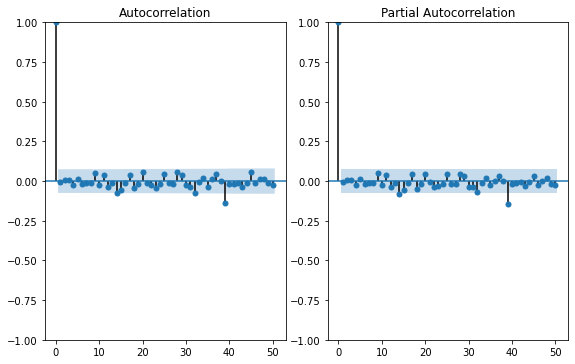

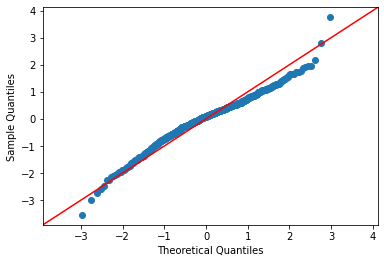

AdjDiv ADF Test
stat=-26.222, p=0.000
stationary at 0.05 significane level


In [41]:

fig, ax = plt.subplots(1,2, figsize=(8,5))
fig.tight_layout()
sm.graphics.tsa.plot_acf(df['return'],lags=50, ax=ax[0])
sm.graphics.tsa.plot_pacf(df['return'],lags=50, ax=ax[1])
plt.show()

sm.qqplot(df['return'],line='45')
plt.show()

# ADF Test
df = df.dropna()
print('AdjDiv ADF Test')
adf_stat, p, _,_,_,_ = sm.tsa.stattools.adfuller(df['return'])
print('stat=%.3f, p=%.3f' % (adf_stat, p))
if p > 0.05:
    print('Not Stationary at 0.05 significance level')
else:
    print('stationary at 0.05 significane level')
    



#### ADF Test
The ADF is a test for stationary, useful for time series analysis, and tests for presence of a unit root. However, it does not test for seasonality!!!

A time series could easily just have a seasonal component, and no trend, and an ADF test would tell you that the series is stationary, despite the seasonal component!


You would use this test to see if there was any trend present, not for seasonality

### Volatility Observations

#### Volatility Clustering
Volatility clustering refers to the observation that "large changes tend to be followed by large changes, and small changes tend to be followed by small changes".


In [42]:
df['vol']=df['lnReturn'].sub(df['lnReturn'].mean()).pow(2)

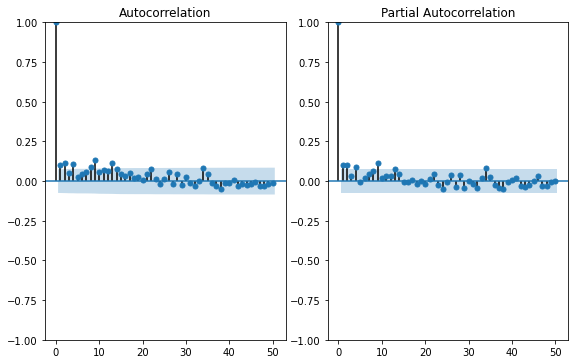

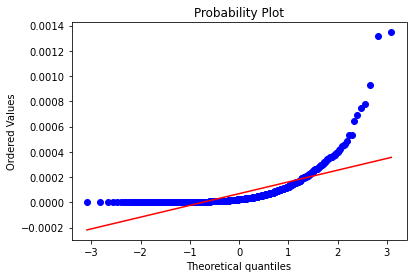

AdjDiv ADF Test
stat=-6.231, p=0.000
stationary at 0.05 significane level


In [49]:
fig, ax = plt.subplots(1,2, figsize=(8,5))
fig.tight_layout()
sm.graphics.tsa.plot_acf(df['vol'],lags=50, ax=ax[0])
sm.graphics.tsa.plot_pacf(df['vol'],lags=50, ax=ax[1])
plt.show()

stats.probplot(df['vol'], dist="norm",plot=plt)
plt.show()

# ADF Test
df = df.dropna()
print('AdjDiv ADF Test')
adf_stat, p, _,_,_,_ = sm.tsa.stattools.adfuller(df['vol'])
print('stat=%.3f, p=%.3f' % (adf_stat, p))
if p > 0.05:
    print('Not Stationary at 0.05 significance level')
else:
    print('stationary at 0.05 significane level')
    
